In [1]:
#ИМПОРТ ПАКЕТОВ ПРИЛОЖЕНИЙ

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

## Задание 1

Дано (файл Stock.csv, файл Sales.csv):
1.	Остаток товара на складе, дата оценки остатка на складе
2.	Продажи товара за день в штуках, дата продажи товара
Задача:
С использованием Python, посчитать среднедневные продажи за последние 30 дней, когда товарный остаток > 0.


In [2]:
#ИМПОРТ ДАННЫХ
stock = pd.read_csv('Stock.csv',  delimiter=';')
sales = pd.read_csv('Sales.csv', delimiter=';')


In [3]:
# ОБЪЕДИНЯЮ ТАБЛИЦЫ
df = pd.merge(sales, stock, on='date', how='left')

In [4]:
#ПЕРЕВОЖУ ДАТУ В ФОРМАТ datetime
df.date = pd.to_datetime(df.date)


In [5]:
#ВЫБИРАЮ ТРЕБУЕМУЮ ВЫБОРКУ ДАННЫХ И СЧИТАЮ СРЕДНЕДНЕВНЫЕ ПРОДАЖИ
df[(df.date >= (df.date.max()- pd.offsets.Day(29))) &(df.FreeQty > 0)].Qty_Sold.mean()

46.36666666666667

## Задача 2 - Challenge

Дано (файл Seasonality.csv):
1.	Название категории товаров
2.	Продажи в штуках за день за 2019 год

Задача:
Используя Python и известные тебе библиотеки
1.	Посчитать коэффициент сезонности товарной группы для каждого месяца
2.	Определить типы сезонности
3.	Разбить категории товаров по типу сезонности	
4.	Результат представить как иерархическую структуру групп сезонности и соответствующих им категорий
5.	Нарисовать графики сезонных коэффициентов в зависимости от месяца для групп товаров
6.	Описать критерии группировки товаров по типам сезонности


In [6]:
#ИМПОРТ ДАННЫХ
season = pd.read_csv('Seasonality.csv', delimiter=';', sep='\t', comment='#')

In [7]:
#ПРОВЕРКА ДАННЫХ: ЕСТЬ 363 СТРОКИ БЕЗ УКАЗАНИЯ КАТЕГОРИИ
season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279931 entries, 0 to 279930
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   date      279931 non-null  object
 1   Qty_Sold  279931 non-null  int64 
 2   Cat_Name  279568 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.4+ MB


In [8]:
#МЕНЯЮ ФОРМАТ ДАТЫ НА МЕСЯЦ
season.date = pd.to_datetime(season.date).dt.to_period("M")

In [9]:
#РАССЧИТЫВАЮ КОЭФИИЦИЕНТЫ СЕЗОННОСТИ ПО КАТЕГОРИЯМ
coef = season.groupby(['Cat_Name', 'date']).mean().reset_index()
year_aver = coef['Qty_Sold'].groupby(coef['Cat_Name']).mean()
coef = coef.join(year_aver, how='left', on ="Cat_Name", rsuffix= 'YA')
coef['Seas_Coef'] = coef['Qty_Sold']/coef['Qty_SoldYA']
coef

,Cat_Name,date,Qty_Sold,Qty_SoldYA,Seas_Coef
0,3D Blu-ray,2019-01,11.193548,12.544773,0.892288
1,3D Blu-ray,2019-02,25.392857,12.544773,2.024178
2,3D Blu-ray,2019-03,23.064516,12.544773,1.838576
3,3D Blu-ray,2019-04,15.633333,12.544773,1.246203
4,3D Blu-ray,2019-05,8.903226,12.544773,0.709716
...,...,...,...,...,...
10244,"Ящик, коробка рыболовные",2019-08,33.032258,19.257725,1.715273
10245,"Ящик, коробка рыболовные",2019-09,19.466667,19.257725,1.010850
10246,"Ящик, коробка рыболовные",2019-10,13.709677,19.257725,0.711905
10247,"Ящик, коробка рыболовные",2019-11,19.400000,19.257725,1.007388


In [10]:
#МЕНЯЮ ФОРМАТ ПРЕДСТАВЛЕНИЯ ДАННЫХ, РАССЧИТЫВАЮ СТАТИСТИКИ ПО КАТЕГОРИЯМ ТОВАРА
data = pd.pivot_table(coef, values='Seas_Coef', index=['date'],
                    columns=['Cat_Name']).reset_index()
statistics = data.describe()
statistics

Cat_Name,3D Blu-ray,Audio CD,Audio MC (кассета),Audio/video кассеты,Blu-ray,Blu-ray с дополнениями,Blu-ray Audio,Blu-ray+CD,CD+Blu-ray Audio,CD+DVD Audio,...,Эндокринология,Энергетические напитки,Эротические белье и обувь,"Эротические сувенир, игра",Эротический аксессуар,Эхолоты,Ювелирные часы,Ягоды свежие,Яйцо пищевое,"Ящик, коробка рыболовные"
count,12.000000,12.000000,12.000000,2.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,8.000000,12.000000,12.000000,12.000000
mean,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,0.466977,0.339223,0.137232,0.0,0.376475,0.572020,0.370742,0.149234,0.316634,0.426957,...,0.423616,0.513972,0.636403,0.981146,0.924937,0.466856,0.421720,0.618073,0.296111,0.437222
min,0.609430,0.656789,0.880014,1.0,0.680578,0.421598,0.729308,0.824607,0.727012,0.701234,...,0.428711,0.294087,0.310073,0.207389,0.192881,0.498326,0.621146,0.198615,0.417949,0.373541
25%,0.702645,0.871288,0.880014,1.0,0.762776,0.524768,0.794759,0.901914,0.838979,0.754098,...,0.699556,0.521680,0.483735,0.532026,0.389369,0.704395,0.621146,0.622812,0.886613,0.687198
50%,0.850545,0.920501,0.982873,1.0,0.854045,0.680588,0.857093,0.975785,0.924842,0.868844,...,0.974238,1.160247,0.942630,0.679776,0.635761,0.970012,0.971911,0.975211,0.961906,0.960151
75%,0.980767,1.004517,1.067017,1.0,1.072604,1.502132,1.019100,1.083770,1.016234,1.105362,...,1.222517,1.263418,1.210954,1.011975,1.287946,1.066473,1.125828,1.266663,1.088274,1.185155
max,2.024178,2.020627,1.320021,1.0,1.788188,1.960432,2.040022,1.236911,1.872674,2.240726,...,1.667069,1.768253,2.483345,3.796561,3.279142,2.247168,1.863439,2.453107,1.567406,1.715453


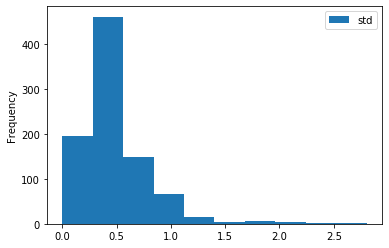

In [11]:
#РИСУЮ ГИСТОГРАММУ РАСПРЕДЕЛЕНИЯ СТАНДАРТНОГО ОТКЛОНЕНИЯ 
pd.DataFrame(statistics.values[2], columns =['std']).plot(kind='hist', bins=10)
plt.show()

In [12]:
#НА ОСНОВЕ ГИСТОГРАММЫ ДЕЛЮ ДАННЫЕ НА ТРИ ТИПА В ЗАВИСИМОСТИ ОТ ПОКАЗАТЕЛЯ СТАНДАРТНОГО ОТКЛОНЕНИЯ
std= statistics.iloc[2].reset_index()

low = std.loc[std['std'] <= 0.28]
medium = std.loc[(std['std'] > 0.28) & (std['std'] <= 0.56)]
high = std.loc[(std['std'] > 0.56)]

In [13]:
#ВЫБИРАЮ ТОВАРНЫЕ КАТЕГОРИИ С ВЫСОКОЙ СЕЗОННОСТЬЮ
coef_high = coef.set_index('Cat_Name').join(high.set_index('Cat_Name'), how='inner')
coef_high

,date,Qty_Sold,Qty_SoldYA,Seas_Coef,std
Cat_Name,,,,,
Blu-ray с дополнениями,2019-01,1.500000,3.162569,0.474298,0.572020
Blu-ray с дополнениями,2019-02,1.941176,3.162569,0.613797,0.572020
Blu-ray с дополнениями,2019-03,1.538462,3.162569,0.486459,0.572020
Blu-ray с дополнениями,2019-04,1.333333,3.162569,0.421598,0.572020
Blu-ray с дополнениями,2019-05,5.307692,3.162569,1.678285,0.572020
...,...,...,...,...,...
Ягоды свежие,2019-08,18.580645,14.885666,1.248224,0.618073
Ягоды свежие,2019-09,11.966667,14.885666,0.803905,0.618073
Ягоды свежие,2019-10,3.880000,14.885666,0.260653,0.618073


In [14]:
#СМОТРЮ, В КАКИЕ МЕСЯЦЫ У ТОВАРНЫХ КАТЕГОРИЙ САМЫЕ БОЛЬШИЕ ПРОДАЖИ
coef_high['rank'] =coef_high.groupby('Cat_Name')['Seas_Coef'].rank(ascending=False)
coef_high[coef_high['rank'] == 1].groupby('date')['rank'].count()

date
2019-02     11
2019-03      2
2019-04      7
2019-05      4
2019-06     11
2019-07      4
2019-08      9
2019-09      5
2019-10      7
2019-11     30
2019-12    155
Freq: M, Name: rank, dtype: int64

In [15]:
#ПОЛУЧАЮ СПИСОК СЕЗОННЫХ ТОВАРНЫХ КАТЕГОРИЙ ПО МЕСЯЦАМ 
coef_high[coef_high['rank'] == 1].sort_values(by=['date', 'Seas_Coef'], ascending =[True, False])[['date', 'Seas_Coef']]

,date,Seas_Coef
Cat_Name,,
Антикварное издание,2019-02,3.729434
Набор для волос мужской,2019-02,3.571132
Горнолыжный спорт,2019-02,3.424589
Сноуборд,2019-02,3.284716
LP + CD,2019-02,2.790899
...,...,...
Запчасти и комплектующие для ноутбука Lap&Comp,2019-12,1.986773
"Раковина, мойка",2019-12,1.985111
"Комод, тумба",2019-12,1.945719


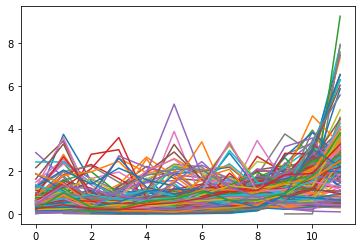

In [16]:
#РИСУЮ ГРАФИК сезонных коэффициентов в зависимости от месяца для категорий товаров с высокой сезонностью
chart1 = pd.pivot_table(coef_high, values='Seas_Coef', index=['date'],
                    columns=['Cat_Name']).reset_index()
for x in chart1.columns:
    if x != 'date':
        chart1[x].plot()
plt.show()


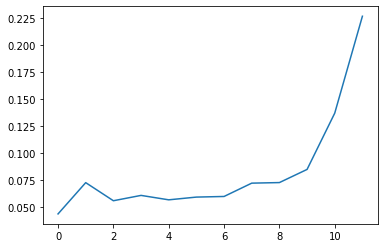

In [18]:
#РИСУЮ ГРАФИК ПО ГРУППЕ ТОВАРОВ С ВЫСОКОЙ СЕЗОННОСТЬЮ
chart_all1 = coef_high.groupby('date')['Qty_Sold'].sum().reset_index()
chart_all1['Qty_SoldYA'] = chart_all1['Qty_Sold'].sum()
chart_all1['Seas_Coef'] = chart_all1['Qty_Sold']/chart_all1['Qty_SoldYA']
chart_all1['Seas_Coef'].plot()

In [19]:
#ВЫБИРАЮ ТОВАРНЫЕ КАТЕГОРИИ СО СРЕДНЕЙ СЕЗОННОСТЬЮ
coef_med = coef.set_index('Cat_Name').join(medium.set_index('Cat_Name'), how='inner')

coef_med

,date,Qty_Sold,Qty_SoldYA,Seas_Coef,std
Cat_Name,,,,,
3D Blu-ray,2019-01,11.193548,12.544773,0.892288,0.466977
3D Blu-ray,2019-02,25.392857,12.544773,2.024178,0.466977
3D Blu-ray,2019-03,23.064516,12.544773,1.838576,0.466977
3D Blu-ray,2019-04,15.633333,12.544773,1.246203,0.466977
3D Blu-ray,2019-05,8.903226,12.544773,0.709716,0.466977
...,...,...,...,...,...
"Ящик, коробка рыболовные",2019-08,33.032258,19.257725,1.715273,0.437222
"Ящик, коробка рыболовные",2019-09,19.466667,19.257725,1.010850,0.437222
"Ящик, коробка рыболовные",2019-10,13.709677,19.257725,0.711905,0.437222


In [20]:
#СМОТРЮ, В КАКИЕ МЕСЯЦЫ У ТОВАРНЫХ КАТЕГОРИЙ САМЫЕ БОЛЬШИЕ ПРОДАЖИ
coef_med['rank'] =coef_med.groupby('Cat_Name')['Seas_Coef'].rank(ascending=False)
coef_med[coef_med['rank'] == 1].groupby('date')['rank'].count()

date
2019-01      1
2019-02     31
2019-03     16
2019-04     11
2019-05      7
2019-06     15
2019-07     20
2019-08     15
2019-09      9
2019-10     12
2019-11    103
2019-12    219
Freq: M, Name: rank, dtype: int64

In [21]:
#ПОЛУЧАЮ СПИСОК СЕЗОННЫХ ТОВАРНЫХ КАТЕГОРИЙ ПО МЕСЯЦАМ 
coef_med[coef_med['rank'] == 1].sort_values(by=['date', 'Seas_Coef'], ascending =[True, False])[['date', 'Seas_Coef']]

,date,Seas_Coef
Cat_Name,,
Аквааэробика,2019-01,1.797030
Видеокамера TV&Audio,2019-02,2.509188
Букинистика: Детям и родителям,2019-02,2.487670
Аудиокнига,2019-02,2.390374
Букинистика: Нехудожественная литератураrn,2019-02,2.371093
...,...,...
Лекарственные средства для животных,2019-12,1.384615
"Крючки, кольца для ванной",2019-12,1.368144
Уголь для кальяна,2019-12,1.366430


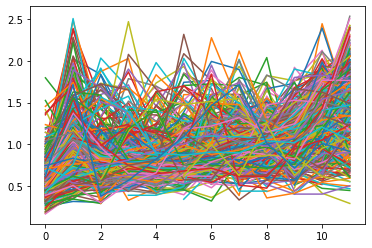

In [22]:
#РИСУЮ ГРАФИК сезонных коэффициентов в зависимости от месяца для категорий товаров со средней сезонностью
chart2 = pd.pivot_table(coef_med, values='Seas_Coef', index=['date'],
                    columns=['Cat_Name']).reset_index()
for x in chart2.columns:
    if x != 'date':
        chart2[x].plot()
plt.show()


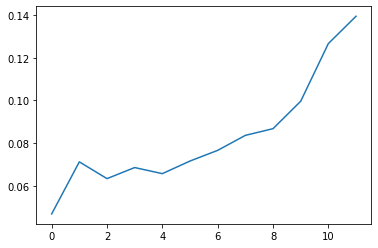

In [23]:
#РИСУЮ ГРАФИК ПО ГРУППЕ ТОВАРОВ Со СРЕДНЕЙ СЕЗОННОСТЬЮ
chart_all2 = coef_med.groupby('date')['Qty_Sold'].sum().reset_index()
chart_all2['Qty_SoldYA'] = chart_all2['Qty_Sold'].sum()
chart_all2['Seas_Coef'] = chart_all2['Qty_Sold']/chart_all2['Qty_SoldYA']
chart_all2['Seas_Coef'].plot()

In [24]:
#ВЫБИРАЮ ТОВАРНЫЕ КАТЕГОРИИ С НИЗКОЙ СЕЗОННОСТЬЮ
coef_low = coef.set_index('Cat_Name').join(low.set_index('Cat_Name'), how='inner')

coef_low

,date,Qty_Sold,Qty_SoldYA,Seas_Coef,std
Cat_Name,,,,,
Audio MC (кассета),2019-01,1.200000,1.136346,1.056017,0.137232
Audio MC (кассета),2019-02,1.166667,1.136346,1.026683,0.137232
Audio MC (кассета),2019-03,1.090909,1.136346,0.960015,0.137232
Audio MC (кассета),2019-04,1.000000,1.136346,0.880014,0.137232
Audio MC (кассета),2019-05,1.000000,1.136346,0.880014,0.137232
...,...,...,...,...,...
Электронные носители информации Access,2019-08,1232.903226,1472.423029,0.837329,0.173182
Электронные носители информации Access,2019-09,1182.666667,1472.423029,0.803211,0.173182
Электронные носители информации Access,2019-10,1316.838710,1472.423029,0.894334,0.173182


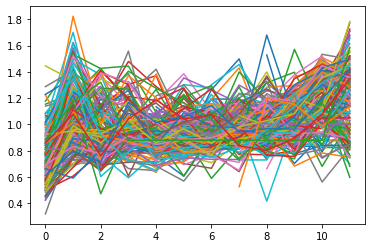

In [25]:
#РИСУЮ ГРАФИК сезонных коэффициентов в зависимости от месяца для категорий товаров с низкой сезонностью
chart3 = pd.pivot_table(coef_low, values='Seas_Coef', index=['date'],
                    columns=['Cat_Name']).reset_index()
for x in chart3.columns:
    if x != 'date':
        chart3[x].plot()
plt.show()

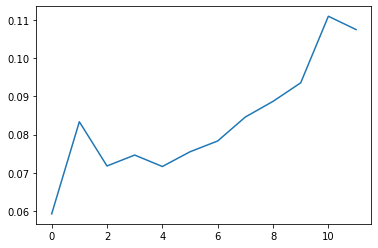

In [26]:
#РИСУЮ ГРАФИК ПО ГРУППЕ ТОВАРОВ С НИЗКОЙ СЕЗОННОСТЬЮ
chart_all3 = coef_low.groupby('date')['Qty_Sold'].sum().reset_index()
chart_all3['Qty_SoldYA'] = chart_all3['Qty_Sold'].sum()
chart_all3['Seas_Coef'] = chart_all3['Qty_Sold']/chart_all3['Qty_SoldYA']
chart_all3['Seas_Coef'].plot()

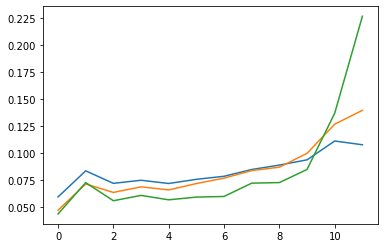

In [27]:
#РИСУЮ ГРАФИКИ ПО 3М ГРУППАМ СЕЗОННОСТИ
chart_all3['Seas_Coef'].plot()
chart_all2['Seas_Coef'].plot()
chart_all1['Seas_Coef'].plot()
plt.show()

In [28]:
#ПОДГОТАВЛИВАЮ ДАННЫЕ ДЛЯ МОДЕЛИ
data_cl = pd.pivot_table(coef, values='Qty_Sold', index=['date'],
                    columns=['Cat_Name']).reset_index()
data_cl =data_cl.drop(['date'], axis = 1)
data_cl=data_cl.T
data_cl=data_cl.fillna(0)
X = data_cl.values
X

array([[ 11.19354839,  25.39285714,  23.06451613, ...,  10.80645161,
          9.34482759,   8.5483871 ],
       [311.48387097, 792.        , 392.5483871 , ..., 413.48387097,
        257.43333333, 348.61290323],
       [  1.2       ,   1.16666667,   1.09090909, ...,   1.28571429,
          1.        ,   1.        ],
       ...,
       [  6.6       ,  19.67857143,  17.35483871, ...,   3.88      ,
          2.95652174,  16.53333333],
       [ 34.61290323,  62.75      , 129.80645161, ...,  84.32258065,
         99.7       ,  86.93548387],
       [ 11.80645161,  33.03571429,   7.19354839, ...,  13.70967742,
         19.4       ,  17.58064516]])

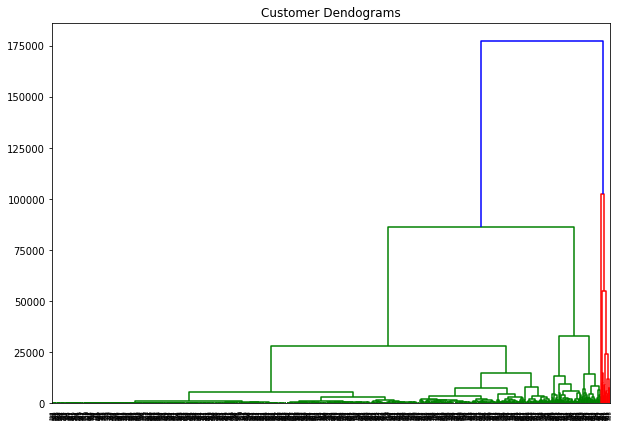

In [29]:
#СТРОЮ ДЕНДОГРАММУ, ЧТОБЫ ОПРЕДЕЛИТЬ КОЛИЧЕСТВО КЛАСТЕРОВ
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [31]:
#ПРЕДСКАЗЫВАЮ РАСПРЕДЕЛЕНИЕ ДАННЫХ ПО КЛАСТЕРАМ
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 4, 6, 4, 4, 6, 6, 4, 6, 6, 6, 6, 6, 4, 6, 6, 2, 6, 4, 6,
       3, 6, 4, 6, 2, 4, 3, 4, 4, 6, 6, 6, 6, 4, 4, 6, 6, 6, 4, 4, 6, 6,
       6, 4, 4, 4, 4, 4, 6, 6, 4, 6, 6, 6, 2, 6, 6, 4, 6, 6, 6, 6, 4, 4,
       4, 6, 6, 6, 4, 2, 6, 6, 6, 6, 6, 4, 6, 6, 6, 4, 4, 6, 6, 6, 6, 6,
       4, 6, 4, 6, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 4, 6, 6, 3, 6, 6, 6, 6,
       4, 2, 3, 6, 4, 2, 6, 4, 4, 4, 4, 6, 6, 6, 6, 6, 4, 6, 6, 6, 6, 6,
       6, 6, 4, 6, 6, 4, 4, 6, 4, 4, 6, 6, 6, 6, 4, 4, 6, 6, 2, 4, 6, 4,
       6, 2, 6, 2, 6, 6, 6, 4, 6, 2, 4, 4, 6, 6, 6, 6, 6, 6, 3, 3, 0, 4,
       2, 6, 6, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6, 6, 6, 4, 6, 6,
       6, 1, 6, 4, 6, 4, 3, 6, 6, 2, 4, 3, 3, 6, 4, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 4, 4, 6, 4, 4, 6, 6, 6, 6, 6, 4, 2, 6, 6, 4, 4, 2, 6,
       4, 6, 6, 6, 6, 6, 4, 6, 6, 6, 2, 6, 1, 2, 6, 6, 6, 4, 4, 6, 4, 2,
       4, 3, 3, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 4,

In [37]:
#ДОБАВЛЯЮ ДАННЫЕ ПО КЛАСТЕРАМ 
data_cl= data_cl.reset_index()
Y=cluster.fit_predict(X)
Y_df=pd.DataFrame(Y, columns=['Cluster'])
cluster_df = data_cl.join(Y_df)
cluster_df.T


cluster_df

,Cat_Name,0,1,2,3,4,5,6,7,8,9,10,11,Cluster
0,3D Blu-ray,11.193548,25.392857,23.064516,15.633333,8.903226,10.533333,11.161290,7.645161,8.310345,10.806452,9.344828,8.548387,6
1,Audio CD,311.483871,792.000000,392.548387,397.266667,350.161290,388.066667,338.483871,342.516129,371.433333,413.483871,257.433333,348.612903,4
2,Audio MC (кассета),1.200000,1.166667,1.090909,1.000000,1.000000,1.000000,1.250000,1.142857,1.500000,1.285714,1.000000,1.000000,6
3,Audio/video кассеты,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6
4,Blu-ray,146.161290,286.392857,270.903226,193.500000,135.064516,125.200000,124.741935,109.000000,114.433333,164.548387,138.500000,113.451613,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,Эхолоты,10.709677,11.777778,5.620690,6.100000,5.129032,7.633333,9.516129,10.709677,9.066667,10.451613,13.666667,23.129032,6
908,Ювелирные часы,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,1.600000,1.000000,2.000000,1.000000,1.529412,1.750000,6
909,Ягоды свежие,6.600000,19.678571,17.354839,12.500000,10.161290,21.900000,36.516129,18.580645,11.966667,3.880000,2.956522,16.533333,6
910,Яйцо пищевое,34.612903,62.750000,129.806452,114.900000,73.967742,71.800000,75.000000,74.064516,85.933333,84.322581,99.700000,86.935484,6


In [308]:
#СЧИТАЮ СЕЗОННЫЕ КОЭФИЦИЕНТЫ ПО КЛАСТЕРАМ
cl1 = cluster_df[cluster_df['Cluster']==0]
cl1 = cl1.drop(['Cluster'], axis = 1)
cl1 = cl1.set_index('Cat_Name').T
cl1['Sum'] = cl1.sum(axis=1)
cl1['Qty_SoldYA'] = cl1['Sum'].mean()
cl1['Seas_Coef'] = cl1['Sum']/cl1['Qty_SoldYA']

Cat_Name,Гигиена тела,Конфеты,Кофе,"Макаронные изделия, крупы",Подгузники детские,"Приправы, специи, травы",Смеси и заменители грудного молока для детей,"Снэки, чипсы, готовые завтраки",Уход за волосами для женщин,Чай,Чистящее и моющее средство
0,3186.612903,2113.322581,3004.677419,6881.354839,3789.903226,2934.935484,2557.419355,5689.161290,3989.774194,3576.096774,5149.903226
1,5387.785714,6030.857143,5732.178571,7416.178571,2918.857143,4613.964286,2052.464286,8517.214286,6447.285714,6741.500000,6194.500000
2,4771.225806,3957.612903,4756.258065,9277.161290,3680.032258,4110.354839,3010.903226,10410.193548,6483.709677,4726.677419,5771.096774
3,4435.366667,2489.133333,5024.633333,7841.666667,4821.600000,4553.300000,3845.466667,8575.066667,6448.866667,4170.866667,6779.133333
4,3872.870968,2319.935484,5377.290323,6882.645161,5421.548387,4024.064516,5387.806452,8356.677419,5751.387097,3946.225806,6308.709677
5,4614.300000,2016.033333,5624.166667,7031.633333,6599.333333,4299.433333,5502.466667,7682.366667,6022.166667,3541.700000,6568.966667
6,3628.451613,2894.645161,6331.354839,7924.193548,6563.580645,5682.967742,6349.612903,8898.161290,6193.419355,4010.451613,6684.193548
7,3852.806452,3837.225806,6575.709677,8680.354839,6525.354839,5790.935484,5871.903226,10055.258065,6911.225806,4840.806452,7190.580645
8,5663.933333,3329.300000,5652.633333,8714.466667,6459.300000,5396.633333,5600.233333,9646.000000,7905.733333,4949.333333,8959.966667
9,6054.129032,3277.516129,7095.096774,10777.225806,7171.516129,5078.193548,6678.000000,11269.580645,10711.935484,6403.903226,8740.548387


In [38]:
cl2 = cluster_df[cluster_df['Cluster']==1]
cl2 = cl2.drop(['Cluster'], axis = 1)
cl2 = cl2.set_index('Cat_Name').T
cl2['Sum'] = cl2.sum(axis=1)
cl2['Qty_SoldYA'] = cl2['Sum'].mean()
cl2['Seas_Coef'] = cl2['Sum']/cl2['Qty_SoldYA']
cl2

Cat_Name,Детская бакалея,"Зоокорм, витамины для кошек и собак",Лицо,Sum,Qty_SoldYA,Seas_Coef
0,8058.870968,9415.258065,6793.064516,24267.193548,40588.163422,0.597888
1,6470.964286,11374.428571,11019.071429,28864.464286,40588.163422,0.711155
2,11616.000000,10959.548387,10038.741935,32614.290323,40588.163422,0.803542
3,14367.033333,11457.233333,10647.733333,36472.000000,40588.163422,0.898587
4,13892.129032,11982.838710,8910.612903,34785.580645,40588.163422,0.857038
5,12518.566667,11672.866667,10283.666667,34475.100000,40588.163422,0.849388
6,16055.935484,12987.225806,10170.193548,39213.354839,40588.163422,0.966128
7,13894.161290,14080.903226,10354.967742,38330.032258,40588.163422,0.944365
8,14580.466667,14178.266667,11449.266667,40208.000000,40588.163422,0.990634
9,17809.838710,15457.258065,15432.193548,48699.290323,40588.163422,1.199840


In [39]:
cl3 = cluster_df[cluster_df['Cluster']==2]
cl3 = cl3.drop(['Cluster'], axis = 1)
cl3 = cl3.set_index('Cat_Name').T
cl3['Sum'] = cl3.sum(axis=1)
cl3['Qty_SoldYA'] = cl3['Sum'].mean()
cl3['Seas_Coef'] = cl3['Sum']/cl3['Qty_SoldYA']
cl3

Cat_Name,Аккумуляторы и батарейки Access,Аксессуар к бытовой технике Access,Аксессуары и уход для обуви,"Банка, контейнер для хранения продуктов",Бумага офисная и бумажная продукция,Бытовая химия для детей,Взрослое рукоделие и творчество / Шитье,Витамины и минеральные вещества,Вода,Вспомогательные средства для стирки и глажения,...,Украшение интерьера,"Фигурки, трансформеры",Фильтры для воды,Чулочно-носочные изделия женские,Электронная техника для дома SDA,Электронные носители информации Access,Электронные товары для красоты и здоровья SDA,Sum,Qty_SoldYA,Seas_Coef
0,1043.838710,1490.806452,618.387097,1035.193548,691.322581,723.451613,889.290323,749.935484,1204.870968,1162.451613,...,754.741935,1011.870968,770.677419,1130.096774,890.129032,1263.193548,1129.451613,45106.290323,78094.091002,0.577589
1,1564.178571,1761.107143,758.178571,1638.750000,1296.964286,906.928571,1464.214286,1188.035714,1253.321429,1339.714286,...,1378.214286,1597.142857,688.392857,2016.821429,955.071429,1587.500000,1542.357143,64770.624286,78094.091002,0.829392
2,1397.645161,1629.580645,610.645161,1184.548387,1226.967742,1085.741935,1342.838710,1682.774194,1360.000000,1340.000000,...,922.870968,975.064516,943.741935,1144.483871,1027.870968,1121.903226,1931.354839,59464.161290,78094.091002,0.761443
3,1620.800000,1577.433333,741.033333,1233.566667,1208.000000,1393.833333,1446.666667,2300.133333,1683.400000,1520.466667,...,978.066667,997.333333,1326.733333,1256.933333,967.300000,1533.266667,1480.400000,69221.766667,78094.091002,0.886389
4,1531.709677,1550.935484,568.935484,999.838710,1264.387097,1310.193548,1192.548387,1823.806452,1774.000000,1728.290323,...,815.161290,1094.483871,978.129032,1243.516129,968.838710,1746.935484,1365.193548,64347.806452,78094.091002,0.823978
5,1706.866667,1590.800000,576.466667,1057.166667,919.033333,1198.833333,1085.833333,2031.733333,2208.433333,1890.200000,...,901.166667,1141.933333,1266.900000,1051.633333,1248.266667,1534.166667,1635.166667,67573.200000,78094.091002,0.865279
6,1839.387097,1356.709677,678.709677,1258.129032,1227.677419,1300.225806,1238.000000,1348.935484,2008.354839,1820.387097,...,1041.451613,1334.709677,1148.774194,1194.032258,1105.806452,1577.903226,1600.451613,67962.709677,78094.091002,0.870267
7,1715.806452,1377.322581,885.387097,1651.709677,2511.806452,1511.096774,1278.677419,1527.193548,2003.096774,2045.387097,...,1233.709677,1328.870968,1133.903226,1751.516129,1171.193548,1232.903226,1907.451613,78593.322581,78094.091002,1.006393
8,1684.633333,1482.566667,1494.633333,1609.566667,1971.266667,1663.833333,1522.300000,2342.266667,1933.400000,2444.400000,...,1205.233333,1249.000000,1064.000000,2426.233333,1328.333333,1182.666667,1845.833333,80443.966667,78094.091002,1.030090
9,1726.129032,1794.580645,2015.870968,1735.806452,1551.870968,1617.290323,1688.000000,2794.193548,2219.032258,2466.419355,...,1210.000000,1645.193548,1226.516129,3618.580645,1370.322581,1316.838710,2130.322581,90046.935484,78094.091002,1.153057


In [40]:
cl4 = cluster_df[cluster_df['Cluster']==3]
cl4 = cl4.drop(['Cluster'], axis = 1)
cl4 = cl4.set_index('Cat_Name').T
cl4['Sum'] = cl4.sum(axis=1)
cl4['Qty_SoldYA'] = cl4['Sum'].mean()
cl4['Seas_Coef'] = cl4['Sum']/cl4['Qty_SoldYA']
cl4

Cat_Name,Аксессуар для уборки,Аксессуар к мобильным устройствам Access,Букинистика,Бумажная продукция,Гигиена детская FMCG nonfood,Гигиена рта,Детские напитки,Детское рукоделие и хобби / Рисование,Детское рукоделие и хобби / Рукоделие,Игры / Настольные игры,...,Средство для стирки,Тело,Товары для хранения,Туалет для животных,Художественная литература для детей,Шоколадные изделия,Электронная кухонная техника SDA,Sum,Qty_SoldYA,Seas_Coef
0,2249.548387,1185.580645,2063.290323,2006.709677,1670.354839,2016.483871,1443.322581,1539.225806,1018.483871,1859.516129,...,1921.580645,1847.774194,1866.419355,1436.903226,1674.645161,1308.870968,2547.709677,54976.677419,93866.329813,0.585691
1,3277.035714,1698.071429,5371.214286,2747.500000,2023.178571,2954.714286,1265.000000,3002.678571,1796.000000,3182.892857,...,1718.857143,3391.000000,2710.964286,1975.750000,3156.035714,3313.571429,2857.107143,87581.785714,93866.329813,0.933048
2,2989.193548,1706.387097,3075.419355,2558.225806,2610.387097,3525.580645,1593.290323,2396.032258,1981.935484,1929.935484,...,1840.451613,2875.096774,1804.870968,1628.967742,2116.903226,2435.483871,2605.903226,73281.677419,93866.329813,0.780702
3,3261.100000,1925.166667,2996.333333,3218.833333,2935.366667,3613.433333,1830.866667,2423.266667,2207.766667,2055.433333,...,2124.066667,2978.300000,2601.066667,1866.766667,2167.300000,2385.366667,2646.100000,79344.233333,93866.329813,0.845290
4,3078.709677,2081.516129,2588.612903,2583.387097,3266.322581,3098.096774,1805.967742,2089.483871,1554.225806,2175.387097,...,2281.870968,2707.580645,2217.870968,2157.387097,2057.967742,2220.774194,2655.064516,72977.129032,93866.329813,0.777458
5,3375.066667,2313.933333,2776.333333,3277.166667,3780.166667,3432.533333,1868.666667,2322.033333,2300.933333,1908.133333,...,2366.100000,2710.466667,1919.433333,2547.733333,2493.433333,2167.800000,3080.033333,78592.066667,93866.329813,0.837276
6,3239.645161,2856.483871,3068.645161,3556.290323,3655.225806,2880.129032,2672.838710,2864.451613,2413.709677,1861.258065,...,2442.387097,2631.225806,1983.064516,2667.903226,2479.193548,2299.967742,3017.645161,83293.548387,93866.329813,0.887363
7,3595.258065,3262.161290,2971.096774,3743.354839,3955.225806,3390.064516,2184.096774,4329.903226,3384.806452,2128.225806,...,2159.451613,2615.258065,2569.645161,2909.354839,2664.129032,2838.193548,3341.741935,96701.741935,93866.329813,1.030207
8,3672.466667,3541.933333,2891.800000,4296.466667,3698.366667,4008.433333,2316.566667,4133.166667,2951.433333,2358.666667,...,2924.066667,3000.700000,2694.066667,3107.233333,2825.900000,2687.700000,3422.266667,98851.366667,93866.329813,1.053108
9,3997.612903,4115.161290,2392.741935,5002.870968,3696.129032,4669.774194,2898.354839,3830.677419,2065.645161,2977.290323,...,2652.193548,4143.677419,3002.032258,3549.032258,3318.612903,3190.967742,3671.161290,107049.677419,93866.329813,1.140448


In [41]:
cl5 = cluster_df[cluster_df['Cluster']==4]
cl5 = cl5.drop(['Cluster'], axis = 1)
cl5 = cl5.set_index('Cat_Name').T
cl5['Sum'] = cl5.sum(axis=1)
cl5['Qty_SoldYA'] = cl5['Sum'].mean()
cl5['Seas_Coef'] = cl5['Sum']/cl5['Qty_SoldYA']
cl5

Cat_Name,Audio CD,DVD-диск,Авто и мото косметика,Автокресла и аксессуары,Автомобильная оптика,Автотовары в дорогу,Аквариум Оборудование,Аксессуар для салона авто,Аксессуар к TV и аудиотехнике Access,Аксессуар к компьютерной технике Access,...,Учебники для школьников,Фитнес,Чертежные принадлежности,Шторы,"Электроинструмент для строительства, ремонта",Электронные сигареты и парители,Электротовары,Sum,Qty_SoldYA,Seas_Coef
0,311.483871,490.322581,106.161290,115.387097,147.451613,482.096774,198.258065,136.096774,247.064516,359.838710,...,274.548387,567.774194,362.935484,400.000000,401.193548,182.677419,355.935484,58245.032258,101145.420289,0.575854
1,792.000000,945.714286,197.892857,159.607143,189.607143,808.714286,321.535714,209.785714,312.964286,449.928571,...,374.428571,674.357143,526.464286,753.857143,519.071429,249.392857,502.071429,93103.428571,101145.420289,0.920491
2,392.548387,694.000000,240.419355,155.451613,195.935484,613.225806,311.322581,191.580645,312.225806,430.064516,...,165.032258,613.709677,430.387097,736.677419,468.258065,208.709677,563.451613,74433.967742,101145.420289,0.735910
3,397.266667,522.000000,372.000000,185.033333,230.866667,740.700000,258.300000,256.400000,329.433333,502.866667,...,199.133333,577.933333,378.833333,818.466667,764.633333,479.066667,614.533333,79933.515119,101145.420289,0.790283
4,350.161290,436.677419,391.096774,242.064516,193.580645,731.645161,236.225806,304.709677,390.645161,512.387097,...,337.322581,543.935484,341.870968,681.612903,663.838710,573.322581,708.483871,78215.209181,101145.420289,0.773295
5,388.066667,483.966667,440.433333,281.700000,214.566667,994.833333,231.033333,408.566667,396.066667,582.200000,...,334.466667,590.600000,418.600000,766.366667,695.533333,301.833333,761.966667,88469.166667,101145.420289,0.874673
6,338.483871,533.064516,422.870968,328.161290,242.096774,1048.161290,250.258065,513.677419,349.580645,648.709677,...,262.064516,570.096774,637.806452,680.354839,747.967742,326.483871,861.161290,92259.387097,101145.420289,0.912146
7,342.516129,457.354839,412.516129,300.000000,263.935484,978.290323,289.709677,510.161290,380.870968,639.096774,...,509.032258,643.967742,1340.870968,779.032258,617.032258,368.580645,780.645161,99398.645161,101145.420289,0.982730
8,371.433333,365.466667,436.733333,233.033333,301.133333,989.800000,214.066667,467.966667,425.300000,688.033333,...,1105.433333,630.766667,811.766667,816.133333,633.066667,390.866667,741.400000,102086.733333,101145.420289,1.009307
9,413.483871,450.322581,464.322581,267.870968,297.161290,1128.322581,354.161290,511.548387,512.451613,662.064516,...,951.000000,780.709677,676.322581,859.161290,631.483871,343.322581,823.193548,115988.286290,101145.420289,1.146748


In [42]:
cl6 = cluster_df[cluster_df['Cluster']==5]
cl6 = cl6.drop(['Cluster'], axis = 1)
cl6 = cl6.set_index('Cat_Name').T
cl6['Sum'] = cl6.sum(axis=1)
cl6['Qty_SoldYA'] = cl6['Sum'].mean()
cl6['Seas_Coef'] = cl6['Sum']/cl6['Qty_SoldYA']
cl6

Cat_Name,Современная печатная книга,Sum,Qty_SoldYA,Seas_Coef
0,24974.096774,24974.096774,29326.57797,0.851586
1,35857.357143,35857.357143,29326.57797,1.222691
2,23332.258065,23332.258065,29326.57797,0.795601
3,23185.700000,23185.700000,29326.57797,0.790604
4,24038.419355,24038.419355,29326.57797,0.819680
5,26896.900000,26896.900000,29326.57797,0.917151
6,25630.129032,25630.129032,29326.57797,0.873956
7,27974.225806,27974.225806,29326.57797,0.953886
8,32701.733333,32701.733333,29326.57797,1.115089
9,33061.677419,33061.677419,29326.57797,1.127362


In [43]:
cl7 = cluster_df[cluster_df['Cluster']==6]
cl7 = cl7.drop(['Cluster'], axis = 1)
cl7 = cl7.set_index('Cat_Name').T
cl7['Sum'] = cl7.sum(axis=1)
cl7['Qty_SoldYA'] = cl7['Sum'].mean()
cl7['Seas_Coef'] = cl7['Sum']/cl7['Qty_SoldYA']
cl7

Cat_Name,3D Blu-ray,Audio MC (кассета),Audio/video кассеты,Blu-ray,Blu-ray с дополнениями,Blu-ray Audio,Blu-ray+CD,CD+Blu-ray Audio,CD+DVD Audio,CD+MP3 Audio,...,"Эротические сувенир, игра",Эротический аксессуар,Эхолоты,Ювелирные часы,Ягоды свежие,Яйцо пищевое,"Ящик, коробка рыболовные",Sum,Qty_SoldYA,Seas_Coef
0,11.193548,1.200000,0.0,146.161290,1.500000,1.785714,1.400000,1.684211,8.387097,0.0,...,3.600000,2.370370,10.709677,0.000000,6.600000,34.612903,11.806452,15335.471864,25123.023943,0.610415
1,25.392857,1.166667,0.0,286.392857,1.941176,3.636364,1.500000,3.368421,24.178571,1.0,...,17.250000,4.173913,11.777778,0.000000,19.678571,62.750000,33.035714,24861.768596,25123.023943,0.989601
2,23.064516,1.090909,0.0,270.903226,1.538462,1.692308,1.500000,1.692308,12.000000,0.0,...,5.586207,2.416667,5.620690,0.000000,17.354839,129.806452,7.193548,19649.386194,25123.023943,0.782127
3,15.633333,1.000000,1.0,193.500000,1.333333,1.333333,1.125000,1.642857,13.066667,1.0,...,4.300000,1.850000,6.100000,3.000000,12.500000,114.900000,10.866667,19984.653078,25123.023943,0.795472
4,8.903226,1.000000,1.0,135.064516,5.307692,1.500000,1.285714,1.333333,9.483871,0.0,...,10.451613,4.225806,5.129032,0.000000,10.161290,73.967742,15.774194,18998.704031,25123.023943,0.756227
5,10.533333,1.000000,0.0,125.200000,1.700000,1.300000,1.000000,2.363636,7.633333,0.0,...,12.133333,5.066667,7.633333,1.000000,21.900000,71.800000,21.033333,21154.987781,25123.023943,0.842056
6,11.161290,1.250000,0.0,124.741935,2.363636,1.555556,1.125000,1.400000,8.258065,0.0,...,18.516129,7.129032,9.516129,1.600000,36.516129,75.000000,28.193548,23146.286101,25123.023943,0.921318
7,7.645161,1.142857,0.0,109.000000,1.869565,1.333333,1.250000,1.545455,7.774194,1.0,...,11.161290,10.000000,10.709677,1.000000,18.580645,74.064516,33.032258,24753.064842,25123.023943,0.985274
8,8.310345,1.500000,0.0,114.433333,4.678571,1.500000,1.166667,1.818182,9.266667,0.0,...,11.466667,10.600000,9.066667,2.000000,11.966667,85.933333,19.466667,25833.425080,25123.023943,1.028277
9,10.806452,1.285714,0.0,164.548387,6.200000,2.400000,1.200000,1.857143,11.903226,1.0,...,16.935484,17.612903,10.451613,1.000000,3.880000,84.322581,13.709677,28438.755820,25123.023943,1.131980


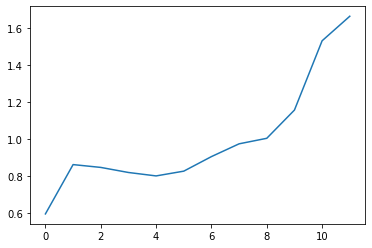

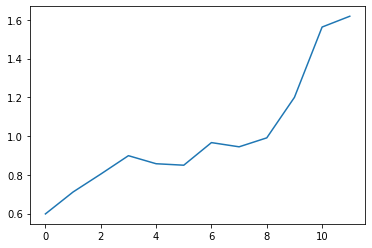

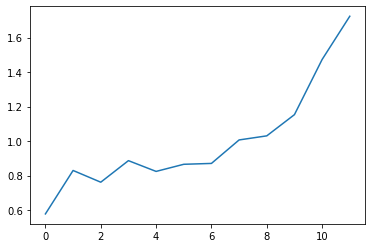

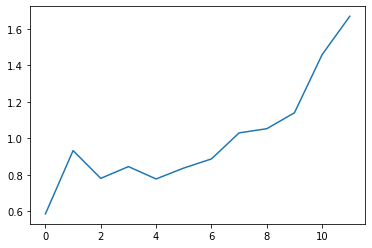

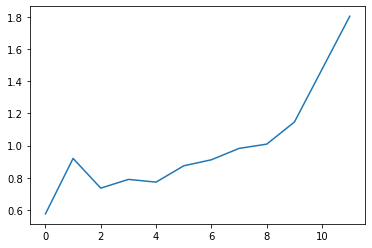

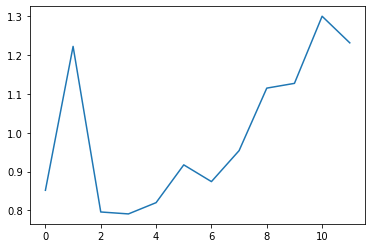

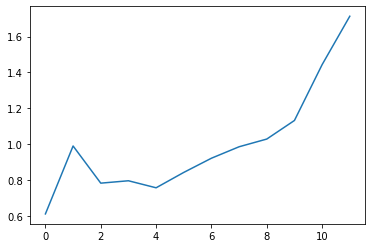

In [334]:
#РИСУЮ ГРАФИКИ КОЭФИЦИЕНТОВ ПО КЛАСТЕРАМ
cl1['Seas_Coef'].plot()
plt.show()
cl2['Seas_Coef'].plot()
plt.show()
cl3['Seas_Coef'].plot()
plt.show()
cl4['Seas_Coef'].plot()
plt.show()
cl5['Seas_Coef'].plot()
plt.show()
cl6['Seas_Coef'].plot()
plt.show()
cl7['Seas_Coef'].plot()
plt.show()